In [61]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import psycopg2

In [62]:
conn = psycopg2.connect(
    dbname="homecrowdb", 
    user="admin", 
    password="pgpwd", 
    host="78.107.239.106", 
    port="5433"
)

query = "SELECT * FROM depression_professional_dataset;"
df = pd.read_sql_query(query, conn)
conn.close()

df.head(20)

C:\Users\admin\AppData\Local\Temp\ipykernel_28908\1748132642.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,gender,age,work_pressure,job_satisfaction,sleep_duration,dietary_habits,suicidal_thoughts,work_hours,financial_stress,history,depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No
5,Female,60,1.0,4.0,7-8 hours,Unhealthy,Yes,12,3,Yes,No
6,Female,30,4.0,2.0,More than 8 hours,Healthy,No,3,1,No,No
7,Male,30,1.0,2.0,More than 8 hours,Unhealthy,Yes,6,1,No,No
8,Male,56,1.0,2.0,More than 8 hours,Moderate,Yes,11,5,Yes,No
9,Female,35,3.0,4.0,Less than 5 hours,Moderate,No,6,4,Yes,No


In [63]:
# Преобразуем категориальные переменные в числовые, удалим пропуски
label_encoder = LabelEncoder()
categorical_columns = ["gender", "sleep_duration", "dietary_habits", "suicidal_thoughts", "history", "depression"]

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [64]:
# Задача: Предсказать уровень депрессии (depression) на основе других факторов
input_columns = ["age", "work_pressure", "job_satisfaction", "sleep_duration", 
                 "dietary_habits", "work_hours", "financial_stress"]
target_column = "depression"

X = df[input_columns].values
y = df[target_column].values

In [65]:
# Разделение данных на тренировочную, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [66]:
# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [67]:
# Построение модели нейросети
model = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1)  # Линейная активация для задачи регрессии
])

In [68]:
# Компиляция модели
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='mse', 
              metrics=['mse'])

In [72]:
# Обучение модели
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=128,
    verbose=1
)

Epoch 1/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0415 - val_mse: 0.0415
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0415 - val_mse: 0.0415
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0388 - mse: 0.0388 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0414 - val_mse: 0.0414
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0414 - val_mse: 0.0414
Epoch 8/50
12/12 [==============================] - 0s 3ms/step - loss: 0.0383 - mse: 0.03

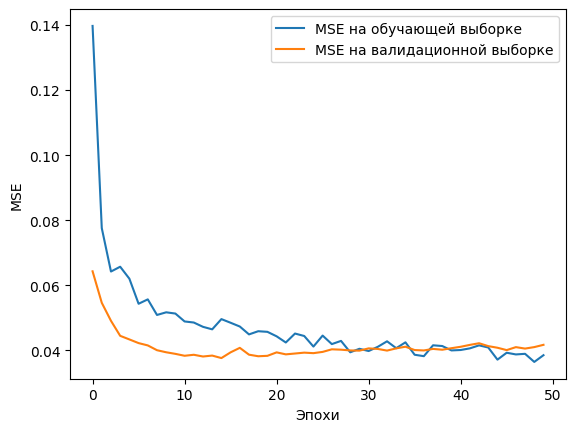

In [70]:
# График MSE на обучающем и валидационном множествах
plt.plot(history.history['mse'], label='MSE на обучающей выборке')
plt.plot(history.history['val_mse'], label='MSE на валидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()
plt.show()


In [71]:
# Оценка модели на тестовых данных
test_mse = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Среднеквадратическая ошибка на тестовом множестве: {test_mse}")

# Выводы о качестве модели
if test_mse < 0.05:
    print("Модель показала хорошее качество предсказания уровня депрессии.")
else:
    print("Качество модели можно улучшить за счет дальнейшей оптимизации.")

Среднеквадратическая ошибка на тестовом множестве: 0.053249847143888474
Качество модели можно улучшить за счет дальнейшей оптимизации.
